# 3.5 First Steps with TensorFlow

## Basics of TensorFlow

In [1]:
import tensorflow as tf

In [2]:
x = tf.zeros((5, 4))
y = tf.ones((5, 4))
x, y

(<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
 array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=float32)>,
 <tf.Tensor: shape=(5, 4), dtype=float32, numpy=
 array([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=float32)>)

In [3]:
x = tf.random.normal(shape=(5, 4), mean=0, stddev=1)
y = tf.random.uniform(shape=(5, 4), minval=0, maxval=1)
print(x.numpy())
print(y.numpy())
print(tf.reduce_mean(x).numpy())
print(tf.math.reduce_std(x).numpy())
print(tf.math.reduce_variance(x).numpy()**.5)
print(tf.reduce_mean(y).numpy())

[[ 0.02592606 -0.68876165 -0.23413625 -0.8021789 ]
 [ 0.5608636   1.2705401   0.08786238  1.8578107 ]
 [ 1.1913493   0.1318173  -0.40236533 -0.82893395]
 [ 0.7148036  -1.2882012  -0.25926605 -0.52212554]
 [ 0.23500833 -1.1634035   0.35154617  1.7228668 ]]
[[0.9726052  0.17493045 0.08924997 0.7671788 ]
 [0.99766517 0.70642805 0.5340551  0.73129725]
 [0.14584672 0.28236198 0.9196328  0.33806622]
 [0.70334196 0.6415622  0.85194373 0.75153875]
 [0.36675882 0.33044887 0.13602757 0.35340774]]
0.09805111
0.88503295
0.88503295
0.5397173


In [4]:
# Numpy arrays are variable, but that of tensorflow's are not
# We have to explicitely write that something is variable
import numpy as np
x = np.zeros(shape=(2, 2))
x[0, 1] = 69
print(x)

y = tf.zeros(shape=(2, 2))
# y[0, 1] = 69
y = tf.Variable(y)
y[0, 1].assign(69)
print(y.numpy())

z = tf.Variable(initial_value=tf.random.uniform(shape=(2, 2)))
z.assign(tf.ones(shape=(2, 2)))
print(z.numpy())
z.assign_add(tf.ones(shape=(2, 2)))
print(z.numpy())

[[ 0. 69.]
 [ 0.  0.]]
[[ 0. 69.]
 [ 0.  0.]]
[[1. 1.]
 [1. 1.]]
[[2. 2.]
 [2. 2.]]


In [5]:
a = tf.random.uniform(shape=(2, 2), minval=4, maxval=4)
b = tf.square(a);
c = tf.sqrt(a);
d = b + c
e = tf.matmul(a, b)
# The following is element-wise multiplication of two tensors
f = b * c

print(a.numpy())
print(b.numpy())
print(c.numpy())
print(d.numpy())
print(e.numpy())
print(f.numpy())

[[4. 4.]
 [4. 4.]]
[[16. 16.]
 [16. 16.]]
[[2. 2.]
 [2. 2.]]
[[18. 18.]
 [18. 18.]]
[[128. 128.]
 [128. 128.]]
[[32. 32.]
 [32. 32.]]


In [6]:
x = tf.Variable(initial_value=tf.random.uniform(shape=(2, 2), minval=4, maxval=4))
with tf.GradientTape() as tape:
  y = tf.square(x)
g = tape.gradient(y, x)
print(x.numpy())
print(y.numpy())
print(g.numpy())

# However, it is not required for x to be a variable(actually it is, but we can do it on the go)
x = tf.constant(3.)
with tf.GradientTape() as tape:
  tape.watch(x)
  y = tf.square(x)
g = tape.gradient(y, x)
print(x.numpy())
print(y.numpy())
print(g.numpy())

[[4. 4.]
 [4. 4.]]
[[16. 16.]
 [16. 16.]]
[[8. 8.]
 [8. 8.]]
3.0
9.0
6.0


## Building a Linear Classifier from Scratch (2D)

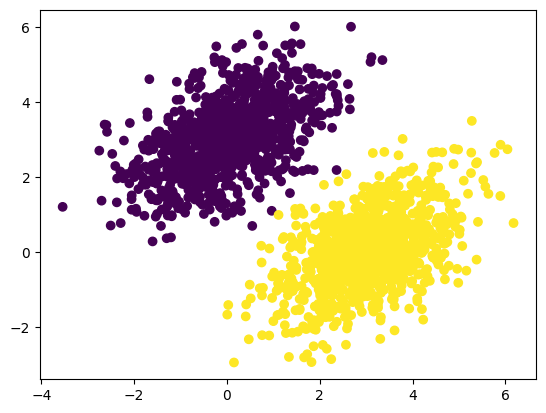

Loss at step 0: 5.2394
Loss at step 1: 0.4997
Loss at step 2: 0.1600
Loss at step 3: 0.1045
Loss at step 4: 0.0914
Loss at step 5: 0.0848
Loss at step 6: 0.0796
Loss at step 7: 0.0750
Loss at step 8: 0.0708
Loss at step 9: 0.0669
Loss at step 10: 0.0634
Loss at step 11: 0.0601
Loss at step 12: 0.0572
Loss at step 13: 0.0544
Loss at step 14: 0.0519
Loss at step 15: 0.0496
Loss at step 16: 0.0475
Loss at step 17: 0.0456
Loss at step 18: 0.0439
Loss at step 19: 0.0422
Loss at step 20: 0.0408
Loss at step 21: 0.0394
Loss at step 22: 0.0382
Loss at step 23: 0.0370
Loss at step 24: 0.0360
Loss at step 25: 0.0350
Loss at step 26: 0.0341
Loss at step 27: 0.0333
Loss at step 28: 0.0326
Loss at step 29: 0.0319
Loss at step 30: 0.0313
Loss at step 31: 0.0307
Loss at step 32: 0.0302
Loss at step 33: 0.0297
Loss at step 34: 0.0293
Loss at step 35: 0.0289
Loss at step 36: 0.0285
Loss at step 37: 0.0282
Loss at step 38: 0.0279
Loss at step 39: 0.0276


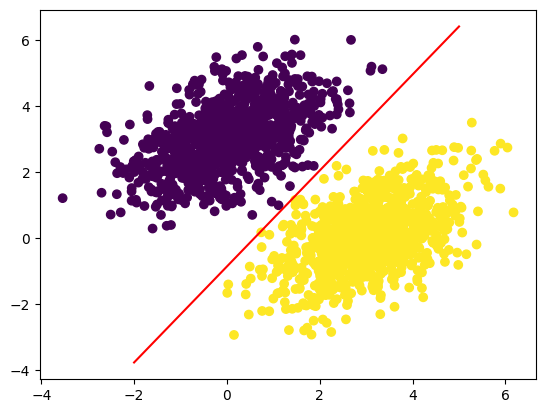

In [36]:
import matplotlib.pyplot as plt

num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],
         [0.5, 1]],
    size=num_samples_per_class
)

positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],
         [0.5, 1]],
    size=num_samples_per_class
)

# plt.scatter(negative_samples[:, 0], negative_samples[:, 1], color="red")
# plt.scatter(positive_samples[:, 0], positive_samples[:, 1], color="blue")
# plt.axis('equal')
# plt.show()


# a = np.array([[1, 2]])
# b = np.array([[3, 4]])
# print(np.stack((a, b)))
# print(np.vstack((a, b)))
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()


input_dim = 2       # Our input will be point in 2D
output_dim = 1      # The output score will be either close to zero or close to one

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.random.uniform(shape=(output_dim,)))


# Here is our forward pass
def model(inputs):
  return tf.matmul(inputs, W) + b

def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)


learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(learning_rate * grad_loss_wrt_W)
  b.assign_sub(learning_rate * grad_loss_wrt_b)
  return loss


for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")


predictions = model(inputs)
# Our equation of line which is separating both the classes
# predict([x, y]) = [x, y].W + b
#                 = W[0].x + W[1].y + b
# line is c = predict([x, y])
# or y = (c - b - W[0].x) / W[1]
c = 0.5
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > c)
x = np.linspace(-2, 5, 100)
y = (c - b - W[0]*x) / W[1]
plt.plot(x, y, color="red")
plt.show()



## Guide for 3D Plotting

In [43]:
mean1 = [0, 3, 1]
mean2 = [3, 0, -1]
cov = [[1, 0.3, 0.1], [0.3, 1, 0.2], [0.1, 0.2, 1]]

class0 = np.random.multivariate_normal(mean1, cov, size=1000)
class1 = np.random.multivariate_normal(mean2, cov, size=1000)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(class0[:, 0], class0[:, 1], class0[:, 2], label='Class 0', alpha=0.6)
ax.scatter(class1[:, 0], class1[:, 1], class1[:, 2], label='Class 1', alpha=0.6)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.legend()
plt.show()

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define plane coefficients
a, b, c, d = 1, 2, 3, 4

# Create a grid of x and y values
x = np.linspace(-10, 10, 10)
y = np.linspace(-10, 10, 10)
X, Y = np.meshgrid(x, y)

# Compute corresponding z values from plane equation
Z = -(a * X + b * Y + d) / c

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.5, color='lightblue')

# Optional: Add points or labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("3D Plane: x + 2y + 3z + 4 = 0")
plt.show()


## Building a Linear Classifier from Scratch (3D)

<ipython-input-84-f4ee38f59673>:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


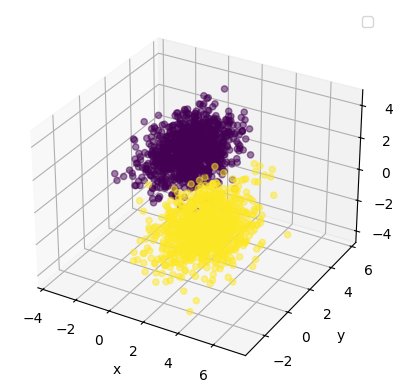

Loss at step 1: 3.52665
Loss at step 2: 0.86317
Loss at step 3: 0.44012
Loss at step 4: 0.29094
Loss at step 5: 0.20431
Loss at step 6: 0.14761
Loss at step 7: 0.10974
Loss at step 8: 0.08437
Loss at step 9: 0.06734
Loss at step 10: 0.05590
Loss at step 11: 0.04820
Loss at step 12: 0.04301
Loss at step 13: 0.03949
Loss at step 14: 0.03711
Loss at step 15: 0.03547
Loss at step 16: 0.03435
Loss at step 17: 0.03357
Loss at step 18: 0.03302
Loss at step 19: 0.03262
Loss at step 20: 0.03234
Loss at step 21: 0.03212
Loss at step 22: 0.03196
Loss at step 23: 0.03183
Loss at step 24: 0.03173
Loss at step 25: 0.03164
Loss at step 26: 0.03157
Loss at step 27: 0.03151
Loss at step 28: 0.03145
Loss at step 29: 0.03141
Loss at step 30: 0.03136
Loss at step 31: 0.03132
Loss at step 32: 0.03129
Loss at step 33: 0.03126
Loss at step 34: 0.03123
Loss at step 35: 0.03120
Loss at step 36: 0.03117
Loss at step 37: 0.03115
Loss at step 38: 0.03113
Loss at step 39: 0.03111
Loss at step 40: 0.03109
Loss at s

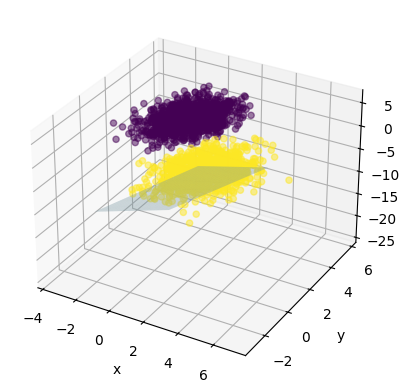

In [84]:
from mpl_toolkits.mplot3d import Axes3D

mean0 = [0, 3, 1]
mean1 = [3, 0, -1]
num_sample_per_class = 1000
covar = [[1, .3, .1],
       [.3, 1, .2],
       [.1, .2, 1]]

class0 = np.random.multivariate_normal(
    mean=mean0,
    cov=covar,
    size=num_samples_per_class
)

class1 = np.random.multivariate_normal(
    mean=mean1,
    cov=covar,
    size=num_samples_per_class
)

inputs = np.vstack((class0, class1)).astype("float32")
targets = np.vstack((np.zeros(shape=(num_samples_per_class, 1), dtype="float32"),
                      np.ones(shape=(num_samples_per_class, 1), dtype="float32")))

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(inputs[:, 0], inputs[:, 1], inputs[:, 2], alpha=0.5, c=targets[:, 0])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.legend()
plt.show()


input_dim = 3
output_dim = 1

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.random.uniform(shape=(output_dim,)))

def model(inputs):
  return tf.matmul(inputs, W) + b

def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(learning_rate * grad_loss_wrt_W)
  b.assign_sub(learning_rate * grad_loss_wrt_b)
  return loss

for step in range(50):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step + 1}: {loss:.5f}")


x = np.linspace(-2, 4, 100)
y = np.linspace(-2, 4, 100)
X, Y = np.meshgrid(x, y)
d = 0.5
Z = (d - W[0] * X - W[1] * Y) / W[2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
predictions = model(inputs)
ax.scatter(inputs[:, 0], inputs[:, 1], inputs[:, 2], alpha=0.5, c=predictions[:, 0] > d)
ax.plot_surface(X, Y, Z, alpha=0.4, color="lightblue")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

# 3.6 Anatomy of a neural network: Understanding core Keras APIs

In [87]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):
  def __init__(self, units, activation):
    super().__init__()
    self.units = units
    self.activation = activation

  def build(self, input_shape):
    input_dim = input_shape[-1]
    self.W = self.add_weight(shape=(input_dim, self.units), initializer="random_normal")
    self.b = self.add_weight(shape=(self.units,), initializer="zeros")

  def call(self, inputs):
    y = tf.matmul(inputs, self.W) + self.b
    if self.activation is not None:
      y = self.activation(y)
    return y


myDense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = myDense(input_tensor)
print(output_tensor.shape)

(2, 32)


In [17]:
import numpy as np
arr = np.random.randint(0, 10, 10)
ind = np.random.permutation(10)
print(arr)
print(ind)
print(arr[ind])

[5 2 8 6 5 0 3 3 4 9]
[3 5 2 0 8 9 6 7 4 1]
[6 0 8 5 4 9 3 3 5 2]
